In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_distribution
import numpy as np
import random

In [67]:


def synthesis():
   n=random.choice([i for i in range (1,5)])
   mat=[-1,1]
   s1=[];s2=[]
   for i in range (2**n):
      s1.append(random.choice(mat))
      s2.append(random.choice(mat))
   return s1,s2
      
      
      

Choosen States for Checking:
f=[1, 1, 1, 1, 1, -1, -1, -1] 

 g=[-1, 1, -1, -1, -1, -1, -1, 1]


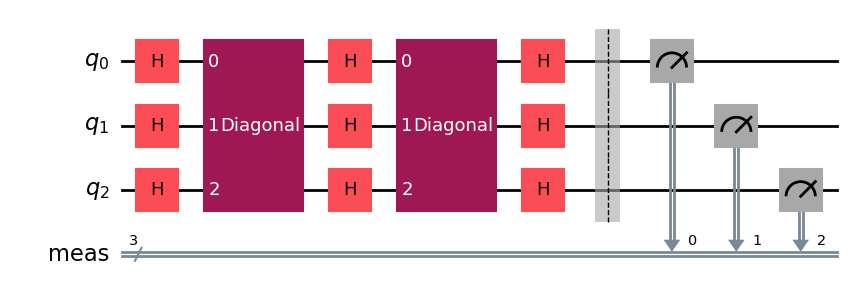

In [78]:
s1,s2=synthesis()

print("Choosen States for Checking:")
print(f"f={s1}","\n\n",f"g={s2}")
qc=FourierChecking(f=s1,g=s2)

qc.measure_all()

qc.decompose().draw(output="mpl")

* Number of states in the $f$ or $g$=$2^{n}$\
  where,$n$ is the number of Qubits

* Number of qubits in the circuit=$log_{2} (|f|)$

In [72]:
from qiskit_ibm_runtime import SamplerV2 as Sampler 
from qiskit_aer import QasmSimulator 
from qiskit import transpile 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService 

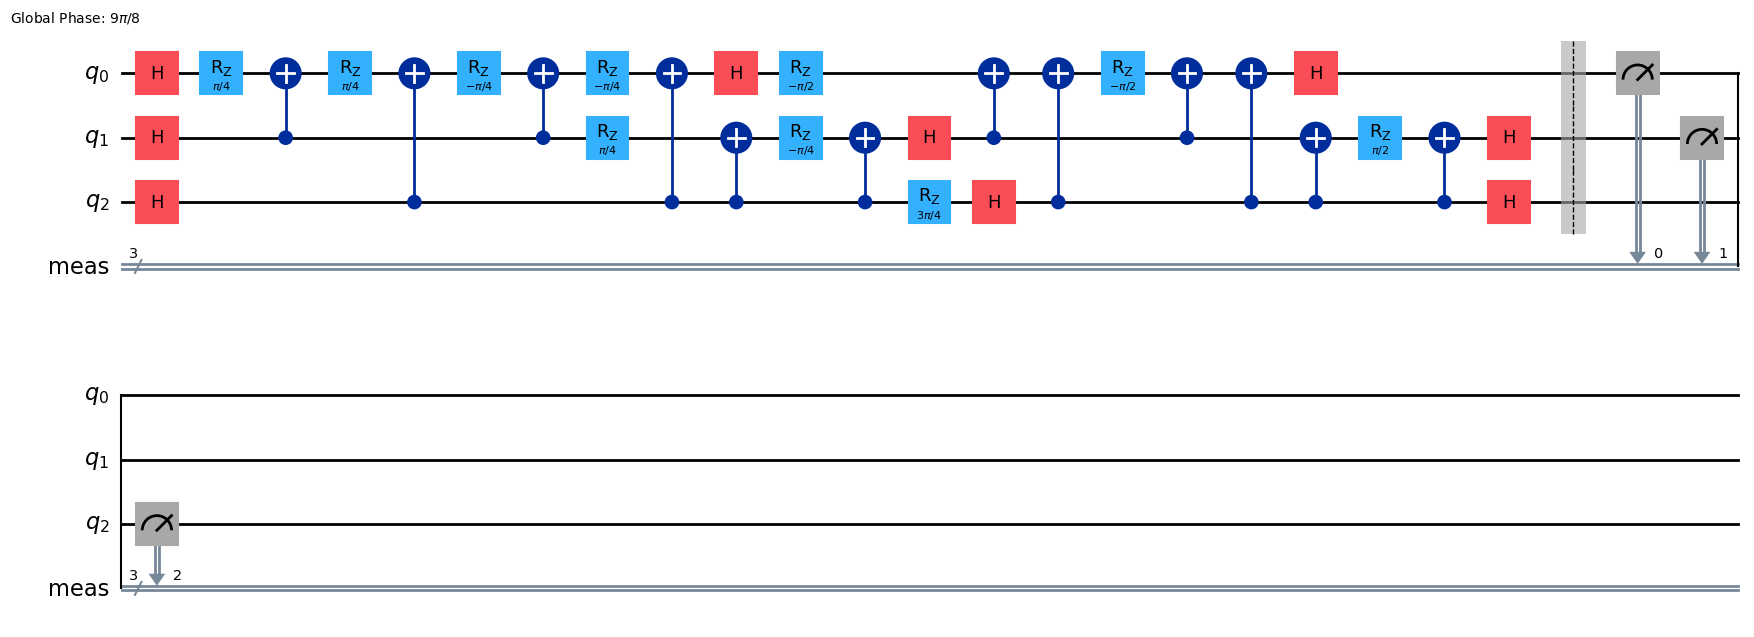

In [79]:
backend_sim=QasmSimulator()

transpiled_circ=transpile(qc,backend_sim)
transpiled_circ.draw("mpl")

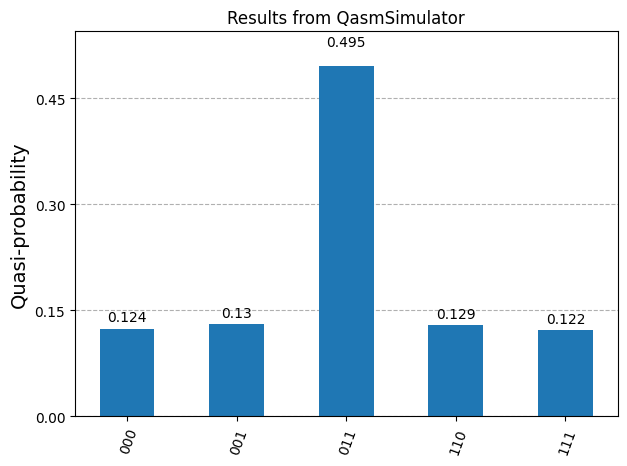

In [82]:
job=backend_sim.run(transpiled_circ,shots=4096)
result=job.result()

plot_distribution(result.get_counts(),title="Results from QasmSimulator")

In [74]:
service=QiskitRuntimeService()
backend=service.least_busy(operational=True,simulator=False)

print(backend.backend_name)

ibm_brisbane


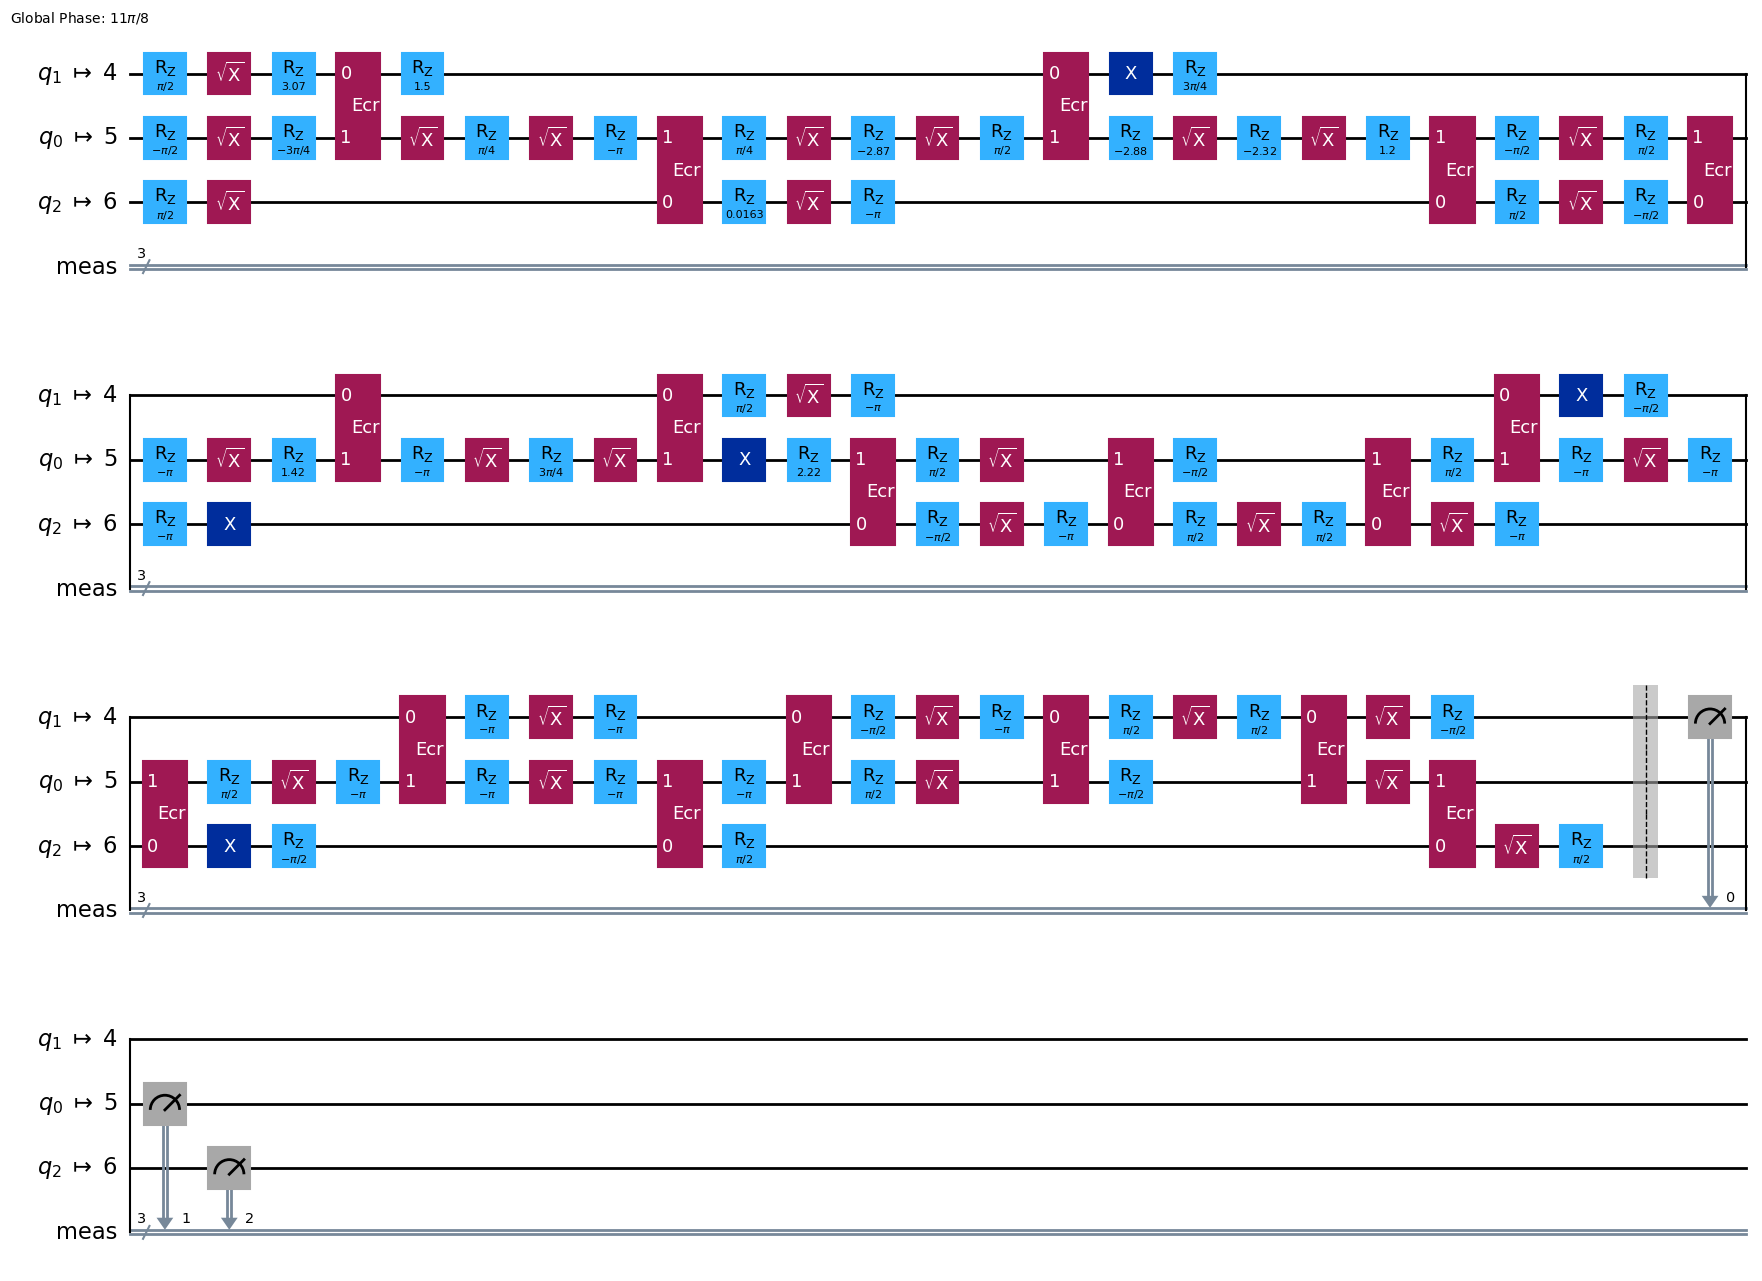

In [84]:
passmanger=generate_preset_pass_manager(backend=backend,optimization_level=3)
opt_qc=passmanger.run(qc)

opt_qc.draw(output="mpl",idle_wires=False)

In [85]:
sampler=Sampler(mode=backend)
pubs=sampler.run([opt_qc])

print(f"Sampler Job Id: {pubs.job_id()}")
result=pubs.result()[0]
counts=result.data.meas.get_counts()

print(counts)

Sampler Job Id: cvj6j38z17rg008djwd0
{'101': 143, '011': 1370, '000': 445, '001': 650, '111': 617, '110': 634, '010': 141, '100': 96}


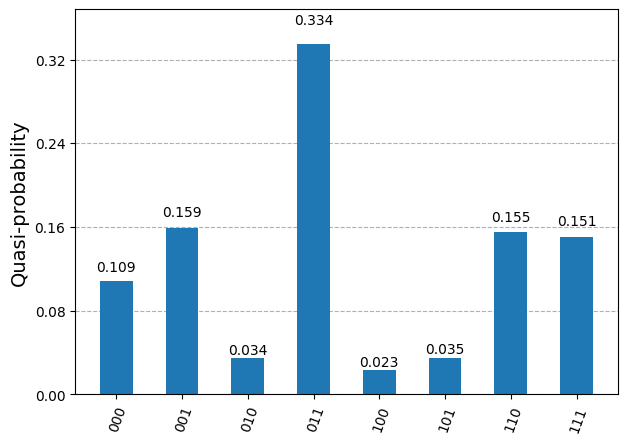

In [86]:
plot_distribution(counts)

Comments: 

Low correlation between f and g. If 000 was highest of all in the distribution, then the correlation between f and g could have been provable.